# Visualizing Errors

### Basic Errorbars

- A basic errorbar can be created with a single Matplotlib function call:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

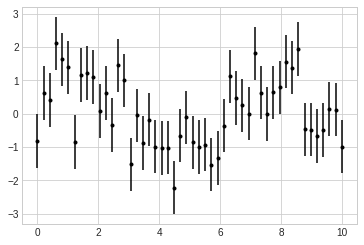

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

- ``fmt`` is line-and-point format code. It uses the same syntax as the shorthand used in ``plt.plot``, outlined in [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb).

- The ``errorbar`` function has many options to fine-tune the outputs. Example (good for crowded plots): to make the errorbars lighter than the points themselves:

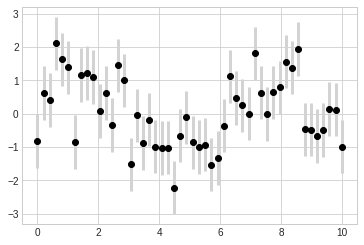

In [4]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

- You can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.

### Continuous Errors

- Sometimes you want to show errorbars on continuous quantities. You can combine ``plt.plot`` and ``plt.fill_between`` to do this.
- Example: a simple *Gaussian process regression* using the Scikit-Learn API. This fits a non-parametric function to data with a continuous measure of the uncertainty.

## Need to debug GaussianProcessRegressor in sklearn 0.19

In [6]:
#from sklearn.gaussian_process import GaussianProcess -- deprecated in sklearn v0.18
from sklearn.gaussian_process import GaussianProcessRegressor 

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1, random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

TypeError: __init__() got an unexpected keyword argument 'corr'

- We now have ``xfit``, ``yfit``, and ``dyfit``, which sample the continuous fit to our data.
- We could pass these to the ``plt.errorbar`` function but we don't really want to plot 1,000 points with 1,000 errorbars.
- Instead, we can use the ``plt.fill_between`` function with a light color to visualize this continuous error:

NameError: name 'xfit' is not defined

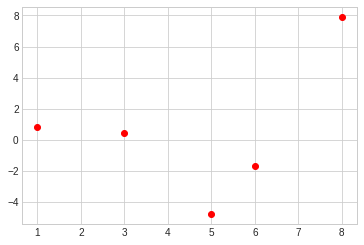

In [7]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

- This gives an intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors. In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.

- For more information on the options available in ``plt.fill_between()`` (and the closely related ``plt.fill()`` function), see the function docstring or the Matplotlib documentation.